In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M = 5000
T = 1000
d1 = 10
d2 = 100
d3 = 50

In [3]:
x = np.linspace(-10 * d1, 10 * d1, M)
k1 = lambda x: 1 / (1 + (x / d1)**2)
def k3(x):
    Y = []
    for i in range(len(x)):
        if x[i] >= d3:
            Y.append(0)
        else:
            Y.append(1-abs(x[i]/d3))
    return np.array(Y)

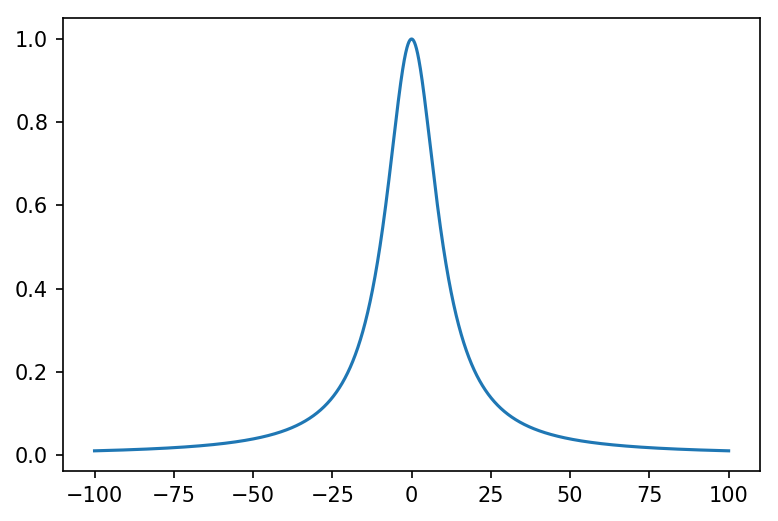

In [4]:
plt.figure(dpi = 150)
plt.plot(x, k1(x))

In [5]:
def S(x):
    if abs(x) > 10 * d1 :
        return 0
    return (1 / (1 + (x / (d1/2))**2))
x1 = np.linspace(-10 * d1, 10 * d1, T)

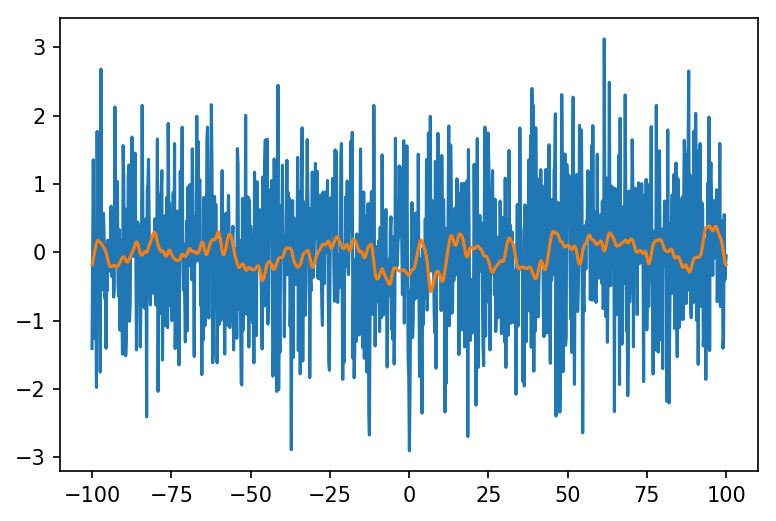

In [6]:
plt.figure(dpi=150)
eps = [np.random.normal(0,1) for i in range(T)]
plt.plot(x1, eps)
eta = []
k = T//15
ss = [S(-k/2 + j) for j in range(k)]
w = sum(ss)
tmp = 0
for m in range(T):
    for j in range(k):
        tmp += eps[m - j] * S(-k/2 + j) / w
    eta.append(tmp)
    tmp = 0
plt.plot(x1, eta)

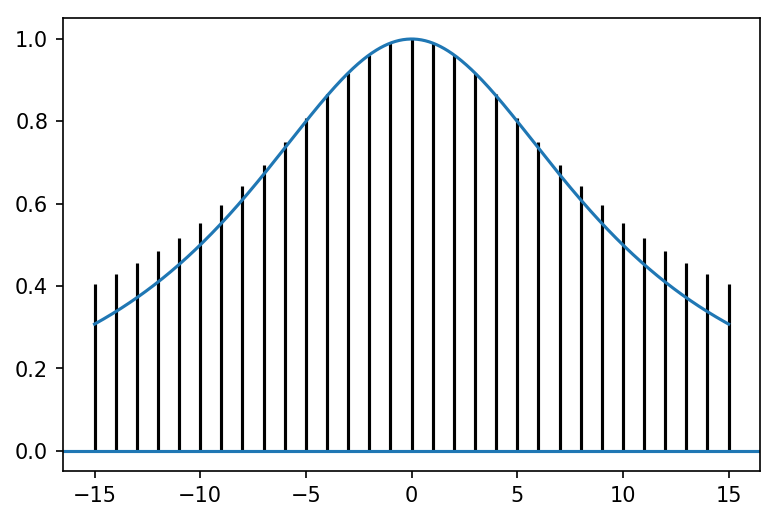

In [7]:
plt.figure(dpi=150)
x2 = np.linspace(-15, 15, T)
cc = plt.xcorr(eta, eta, normed = True, maxlags = 15)
plt.plot(x2, k1(x2))

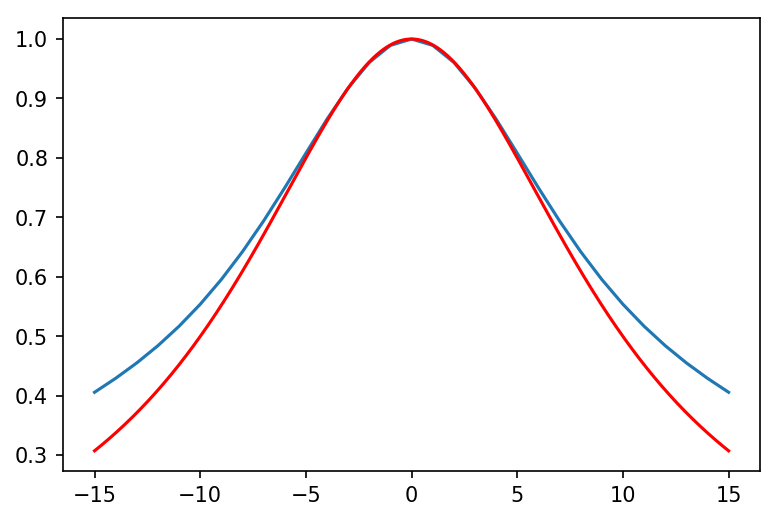

In [8]:
plt.figure(dpi=150)
x3 = np.linspace(-15, 15, 31)
plt.plot(x3 , cc[1])
plt.plot(x2, k1(x2), 'r')

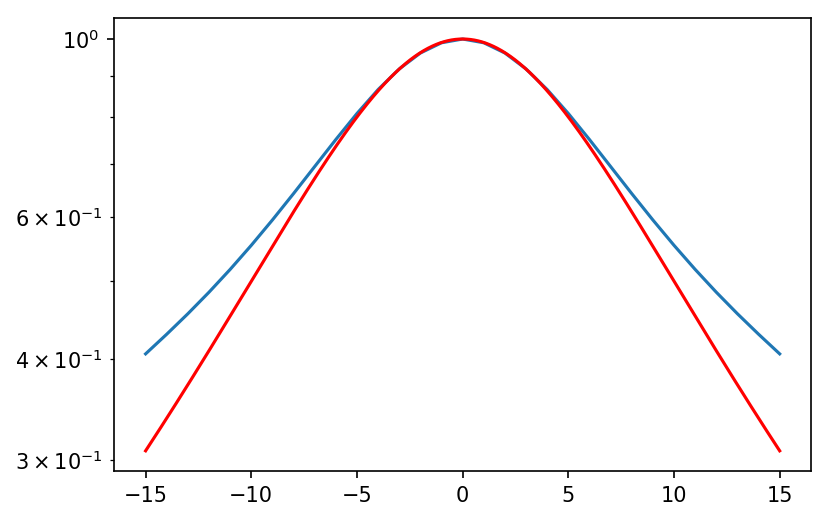

In [9]:
plt.figure(dpi=150)
x3 = np.linspace(-15, 15, 31)
plt.yscale('log')
plt.plot(x3 , cc[1])
plt.yscale('log')
plt.plot(x2, k1(x2), 'r')

In [10]:
from scipy.stats import ks_2samp

In [11]:
x = np.linspace(-10 * d2, 10 * d2, M)
k2 = lambda x: np.exp(-1/2 * x**2 / d2**2)

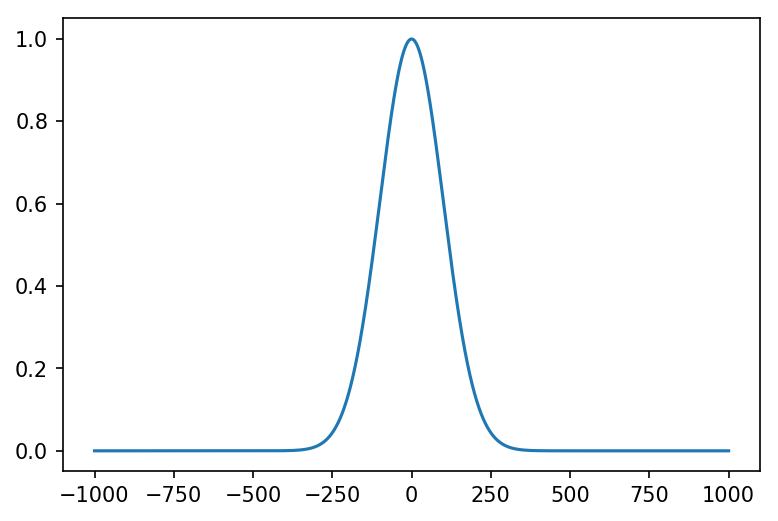

In [12]:
plt.figure(dpi = 150)
plt.plot(x, k2(x))

In [13]:
def S2(x):
    if abs(x) > 10 * d2 :
        return 0
    return np.exp(-1/2 * x**2 / (d2**2 / 2) )
x1 = np.linspace(-10 * d2, 10 * d2, T)

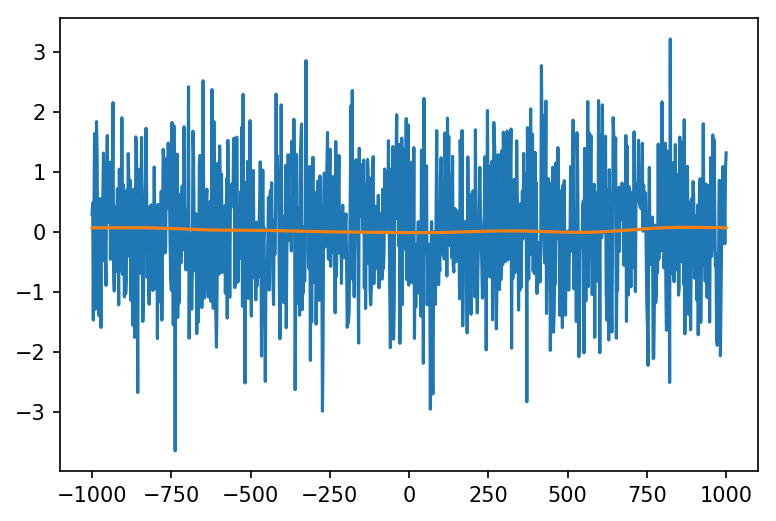

In [14]:
plt.figure(dpi=150)
eps = [np.random.normal(0,1) for i in range(T)]
plt.plot(x1, eps)
k = T//2
ss2 = [S2(-k/2 + j) for j in range(k)]
w2 = sum(ss2)
eta = []
tmp = 0
for m in range(T):
    for j in range(k):
        tmp += eps[m - j] * S2(-k/2 + j) / w2
    eta.append(tmp)
    tmp = 0
plt.plot(x1, eta)

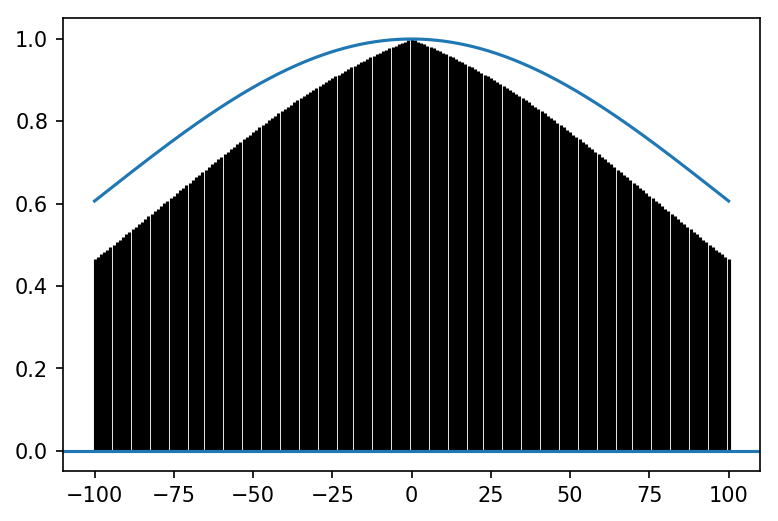

In [15]:
plt.figure(dpi=150)
x2 = np.linspace(-100, 100, T)
cc2 = plt.xcorr(eta, eta, normed = True, maxlags = 100)
plt.plot(x2, k2(x2))

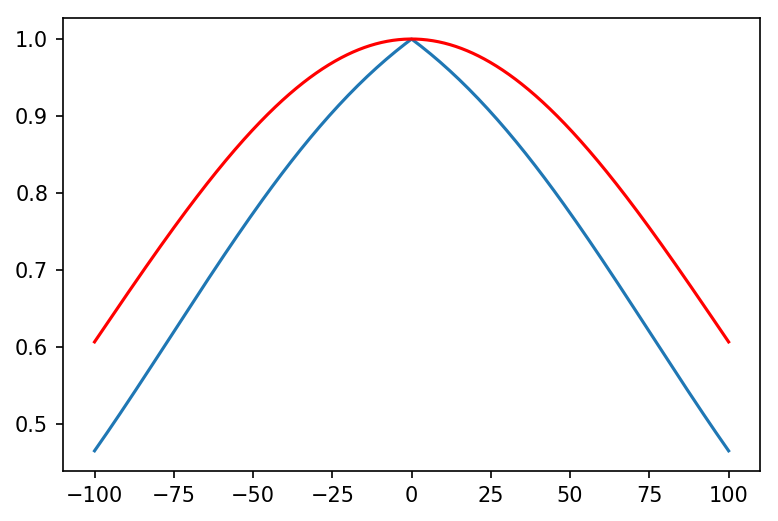

In [16]:
plt.figure(dpi=150)
x3 = np.linspace(-100, 100, 201)
plt.plot(x3 , cc2[1])
plt.plot(x2, k2(x2), 'r')

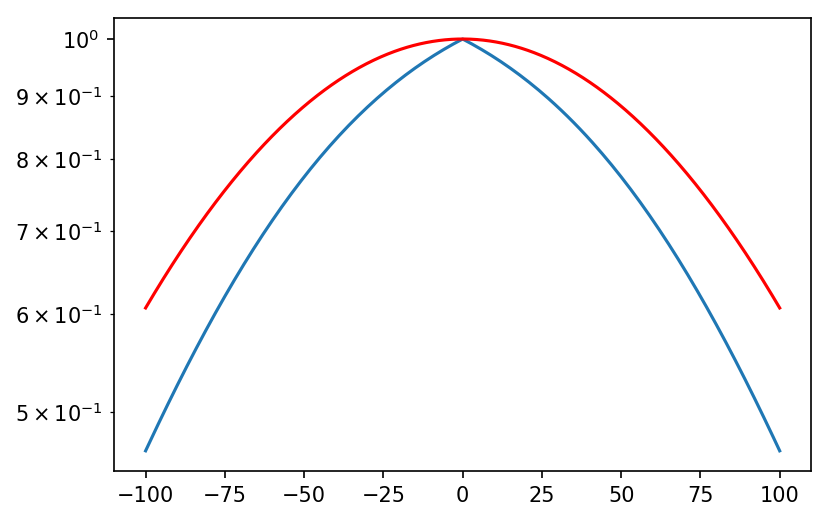

In [17]:
plt.figure(dpi=150)
x3 = np.linspace(-100, 100, 201)
plt.yscale('log')
plt.plot(x3 , cc2[1])
plt.plot(x2, k2(x2), 'r')

In [18]:
ksi1 = np.cumsum(eta)

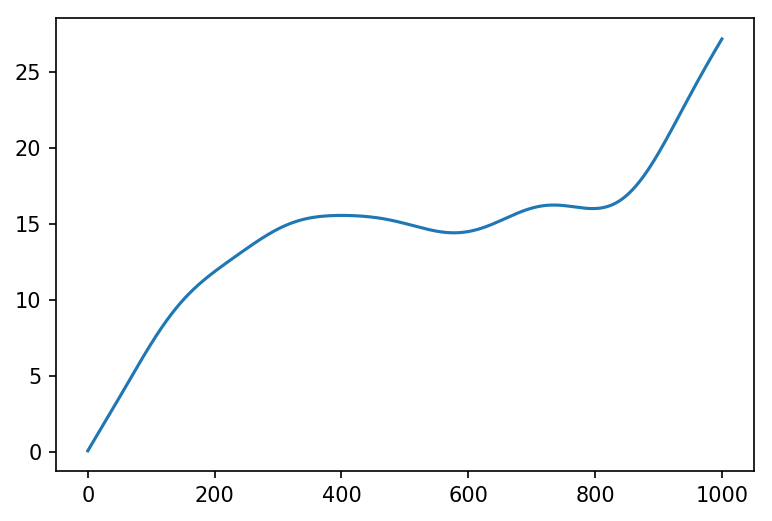

In [19]:
plt.figure(dpi = 150)
x4 = np.linspace(0, len(ksi1), len(ksi1))
plt.plot(x4, ksi1)

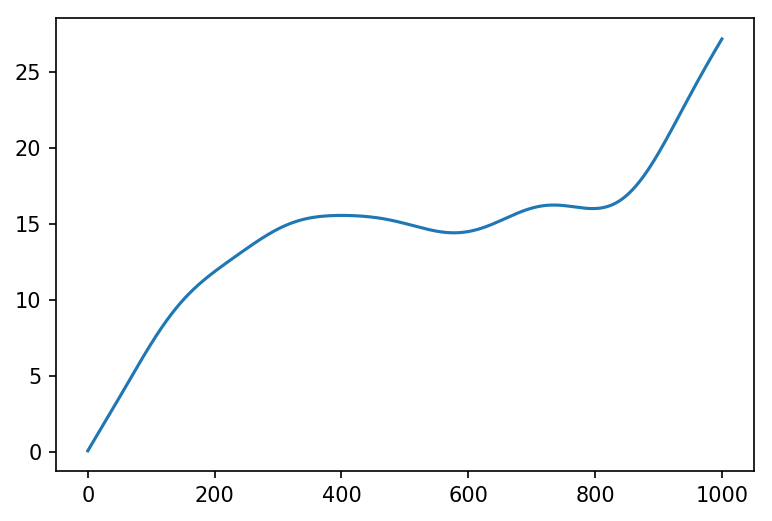

In [20]:
ksi2 = np.cumsum(eta)
plt.figure(dpi = 150)
x4 = np.linspace(0, len(ksi2), len(ksi2))
plt.plot(x4, ksi2)

In [21]:
tau_1 = []
M = 5000
b = int((M ** 0.5) // 3)
p = 0
k = T//15
ss = [S(-k/2 + j) for j in range(k)]
w = sum(ss)

for n in range(M):
    eps = [np.random.normal(0,1) for i in range(T)]
    eta = []
    tmp = 0
    for m in range(T):
        for j in range(k):
            tmp += eps[m - j] * S(-k/2 + j) / w
        eta.append(tmp)
        tmp = 0
    ksi1 = np.cumsum(eta)
    tau = sum(np.array(ksi1 > 0) == True)
    tau_1.append(tau / T)
    if tau / T < 0.05:
        p += 1
    if n%500 == 0:
        print(n)
print( p / M)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
0.1532


(array([3.3212, 1.2512, 0.9752, 0.7636, 0.713 , 0.6716, 0.7682, 0.6532,
        0.8004, 0.6808, 0.5796, 0.7038, 0.6348, 0.621 , 0.6624, 0.667 ,
        0.7176, 0.7314, 0.7912, 0.8602, 0.9292, 1.2236, 3.2798]),
 array([0.        , 0.04347826, 0.08695652, 0.13043478, 0.17391304,
        0.2173913 , 0.26086957, 0.30434783, 0.34782609, 0.39130435,
        0.43478261, 0.47826087, 0.52173913, 0.56521739, 0.60869565,
        0.65217391, 0.69565217, 0.73913043, 0.7826087 , 0.82608696,
        0.86956522, 0.91304348, 0.95652174, 1.        ]),
 <a list of 23 Patch objects>)

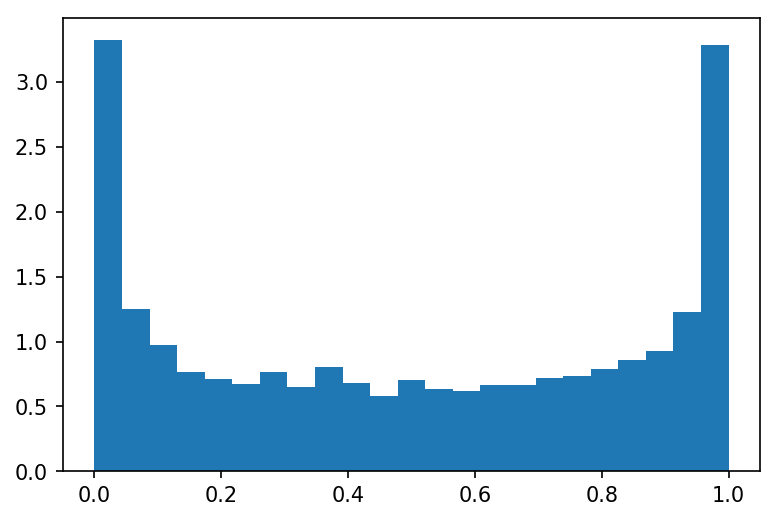

In [22]:
plt.figure(dpi = 150)
plt.hist(tau_1, density = 1, bins = b)

In [23]:
################################################

In [24]:
################################################

In [25]:
p = 0
tau_2 = []
k = T // 15
ss2 = [S2(-k/2 + j) for j in range(k)]
w2 = sum(ss2)

for n in range(M):
    eps = [np.random.normal(0,1) for i in range(T)]
    eta = []
    tmp = 0
    for m in range(T):
        for j in range(k):
            tmp += eps[m - j] * S2(-k/2 + j) / w2
        eta.append(tmp)
        tmp = 0
    ksi1 = np.cumsum(eta)
    tau = sum(np.array(ksi1 > 0) == True)
    tau_2.append(tau / T)
    if tau / T < 0.05:
        p += 1
    if n%500 == 0:
        print(n)
print( p / M)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
0.1576


(array([3.4822, 1.2006, 0.9706, 0.9154, 0.6716, 0.6578, 0.7636, 0.6532,
        0.6578, 0.5428, 0.6394, 0.6118, 0.6164, 0.6486, 0.5704, 0.7038,
        0.6992, 0.7084, 0.7774, 0.8556, 0.9384, 1.2282, 3.4868]),
 array([0.        , 0.04347826, 0.08695652, 0.13043478, 0.17391304,
        0.2173913 , 0.26086957, 0.30434783, 0.34782609, 0.39130435,
        0.43478261, 0.47826087, 0.52173913, 0.56521739, 0.60869565,
        0.65217391, 0.69565217, 0.73913043, 0.7826087 , 0.82608696,
        0.86956522, 0.91304348, 0.95652174, 1.        ]),
 <a list of 23 Patch objects>)

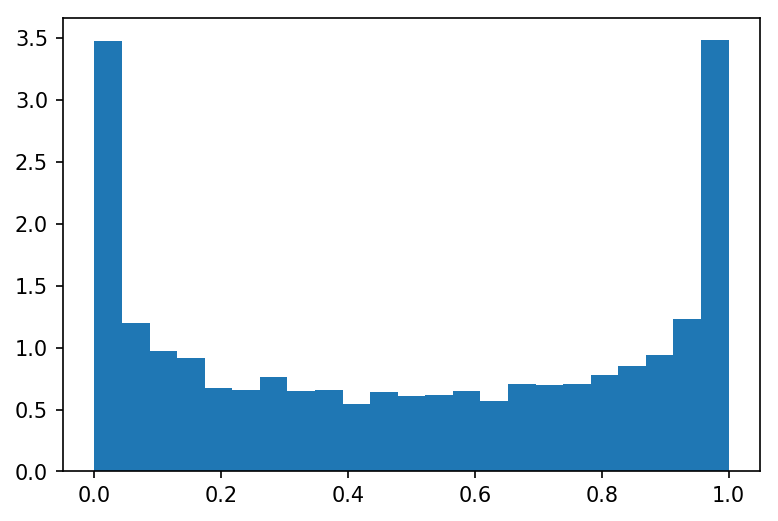

In [26]:
plt.figure(dpi = 150)
plt.hist(tau_2, density = 1, bins = b)

In [27]:
ks_2samp(tau_1, tau_2)

Ks_2sampResult(statistic=0.04260000000000008, pvalue=0.00021930222583120432)

In [28]:
def corrf(x):
    K = []
    ma_path_tr = np.array(x).transpose()
    for i in range(len(x)):
        K.append([])
        for j in range(len(x)):
            K[i].append( sum(ma_path_tr[i] * ma_path_tr[j]) / np.sqrt(ma_path_tr[i].var() * ma_path_tr[j].var()))
    return K

In [29]:
ma_path = []
for i in range(T):   
    eps = [np.random.normal(0,1) for i in range(T)]
    eta = []
    tmp = 0
    k = T//10
    for m in range(T):
        for j in range(k):
            tmp += eps[m - j] * S2(-k/2 + j) / w2
        eta.append(tmp)
        tmp = 0
    ma_path.append(eta)

In [30]:
KKK = corrf(ma_path)
korr = np.array(KKK)[250] - np.array(KKK)[250].mean()

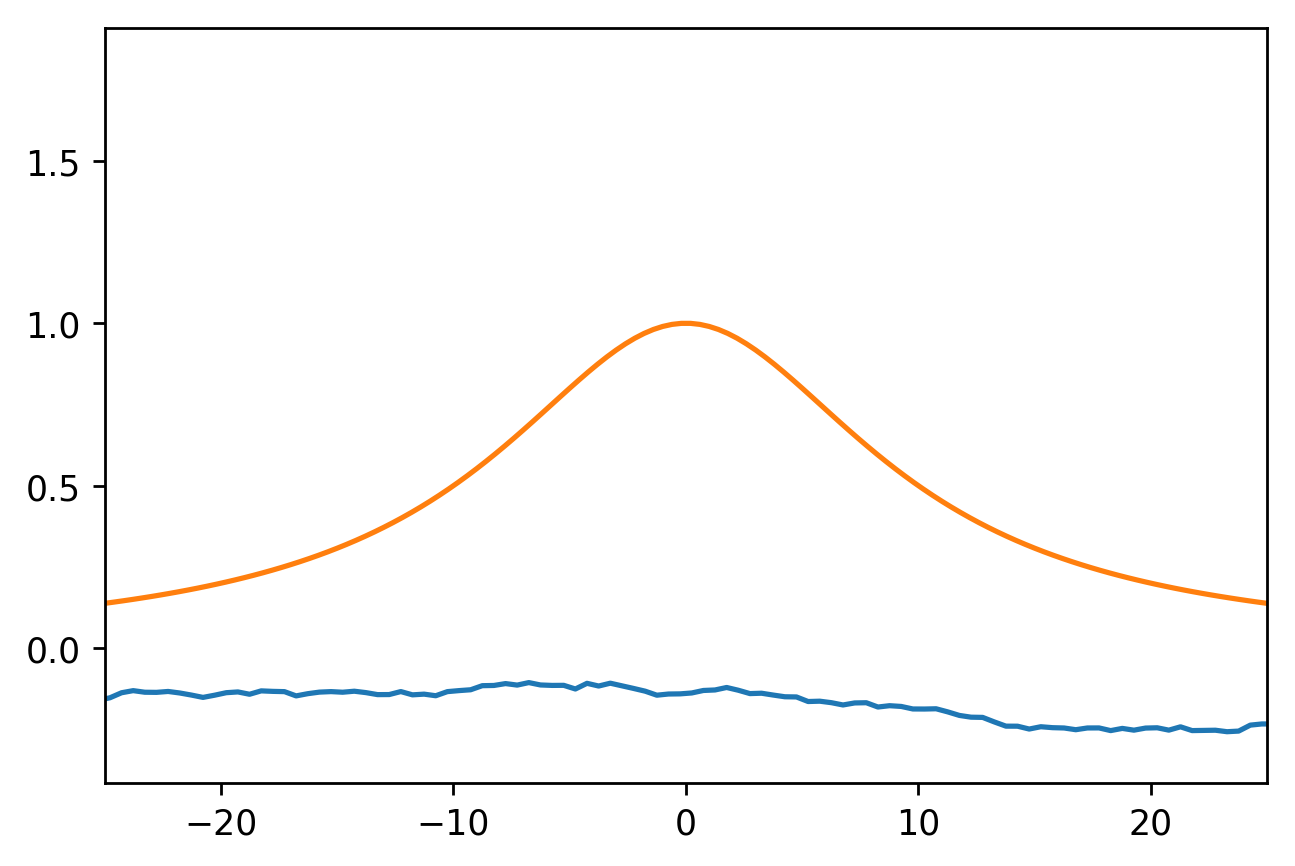

In [33]:
plt.figure(dpi=250)
plt.xlim(-25, 25)
plt.plot(np.linspace(-250,250,1000), korr/500)
plt.plot(x, k1(x))

In [34]:
a = np.random.normal(0,1,100000)

In [35]:
b = np.random.normal(0,1,100000)

In [36]:
from scipy.stats import ks_2samp
ks_2samp(a,b)

Ks_2sampResult(statistic=0.003090000000000037, pvalue=0.725636821295911)